In [1]:
# main function
import numpy as np
import torch
import matplotlib.pyplot as plt

from xopt.bayesian_exploration import bayesian_exploration

# test function
from xopt.evaluators import test_TNK


In [10]:
# Get VOCS
VOCS = test_TNK.VOCS
VOCS['objectives'] = {'y1' : None}

# add reference point
ref = torch.tensor((1.4, 1.4))

print(VOCS)
# Get evaluate function
EVALUATE = test_TNK.evaluate_TNK

# Run
init_x = torch.tensor([[0.9, 0.9], [0.6, 0.6]])
train_x, train_y, train_c = bayesian_exploration(VOCS, EVALUATE,
                                                 n_initial_samples=5,
                                                 mc_samples=128, initial_x=None,
                                                 use_gpu=False,
                                                 sigma=torch.eye(2) * 0.01,
                                                 n_steps=20, verbose=True)

{'name': 'TNK_test', 'description': 'Constrainted test function TNK. See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf', 'simulation': 'test_TNK', 'variables': {'x1': [0, 3.14159], 'x2': [0, 3.14159]}, 'objectives': {'y1': None}, 'constraints': {'c1': ['GREATER_THAN', 0], 'c2': ['LESS_THAN', 0.5]}, 'constants': {'a': 'dummy_constant'}, 'linked_variables': {'x9': 'x1'}}
No executor given. Running in serial mode.
tensor([[1.7201, 0.8708]], dtype=torch.float64)
tensor([[1.4775, 0.9055]], dtype=torch.float64)
tensor([[1.3033, 0.7462]], dtype=torch.float64)
tensor([[1.1518, 0.7472]], dtype=torch.float64)
tensor([[1.0845, 0.7924]], dtype=torch.float64)
tensor([[1.0330, 0.8513]], dtype=torch.float64)
tensor([[0.9750, 0.8993]], dtype=torch.float64)
tensor([[0.9061, 0.9345]], dtype=torch.float64)
tensor([[0.8302, 0.9559]], dtype=torch.float64)
tensor([[0.7509, 0.9662]], dtype=torch.float64)
tensor([[0.6705, 0.9679]], dtype=torch.float64)
tensor([[0.5914, 0.9627]], dtype=torch.float64

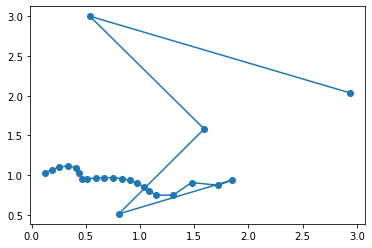

In [11]:
fig, ax = plt.subplots()
ax.plot(train_x[:, 0], train_x[:, 1], '-o')

plt.show()